In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('complete_dataset.csv',index_col='date')

In [4]:
df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
date,,,,,,,,,,,,,
01-01-2015,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
02-01-2015,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0.0,N,N
03-01-2015,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
04-01-2015,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
05-01-2015,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [5]:
df.columns

Index(['demand', 'RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday'],
      dtype='object')

In [6]:
df=df.drop(['RRP', 'demand_pos_RRP', 'RRP_positive', 'demand_neg_RRP',
       'RRP_negative', 'frac_at_neg_RRP', 'min_temperature', 'max_temperature',
       'solar_exposure', 'rainfall', 'school_day', 'holiday'],axis=1)

In [7]:
df.index=pd.to_datetime(df.index,format='%d-%m-%Y')

In [8]:
df.index.freq='D'

In [9]:
df.index

DatetimeIndex(['2015-01-01', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-05', '2015-01-06', '2015-01-07', '2015-01-08',
               '2015-01-09', '2015-01-10',
               ...
               '2020-09-27', '2020-09-28', '2020-09-29', '2020-09-30',
               '2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04',
               '2020-10-05', '2020-10-06'],
              dtype='datetime64[ns]', name='date', length=2106, freq='D')

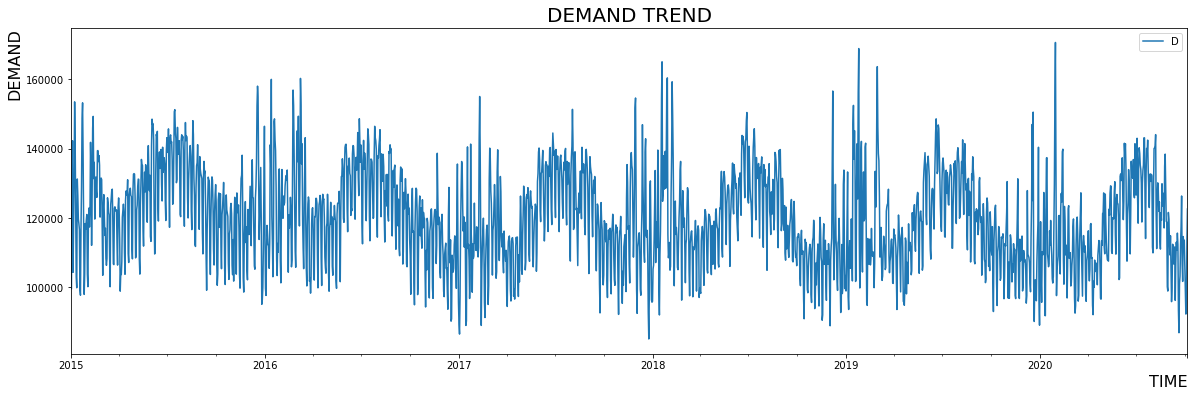

In [70]:
df['demand'].plot(figsize=(20,6))
plt.title('DEMAND TREND', fontsize=20)
plt.xlabel('TIME', fontsize=16, loc='right')
plt.ylabel('DEMAND', fontsize=16, loc='top')
plt.legend('DEMAND', loc='upper right', fontsize=10) 
plt.savefig('DEMAND TREND', dpi = 300)

# ETS DECOMPOSITION

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Revanth\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


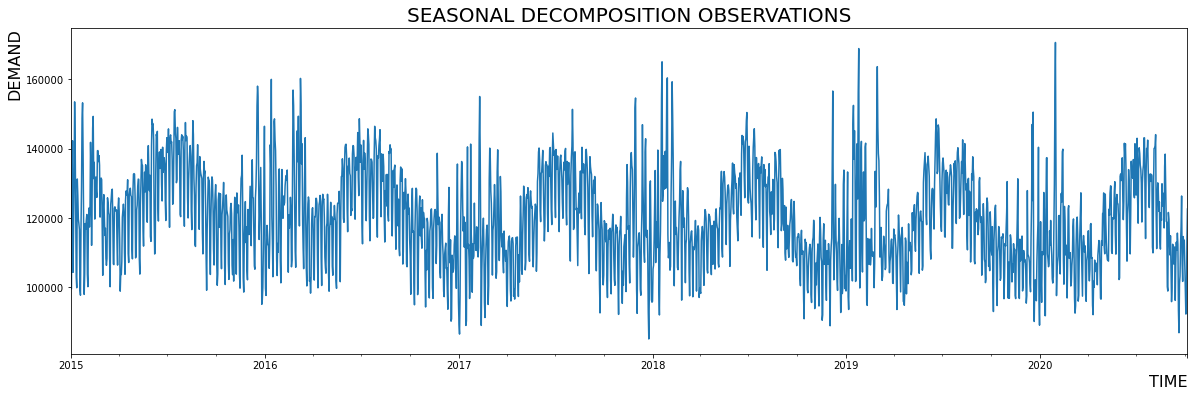

In [69]:
results = seasonal_decompose(df['demand'])
results.observed.plot(figsize=(20,6))

plt.title('SEASONAL DECOMPOSITION OBSERVATIONS', fontsize=20)
plt.xlabel('TIME', fontsize=16, loc='right')
plt.ylabel('DEMAND', fontsize=16, loc='top')
plt.savefig('#2 SEASONAL DECOMPOSITION OBSERVATIONS GRAPH', dpi = 300)

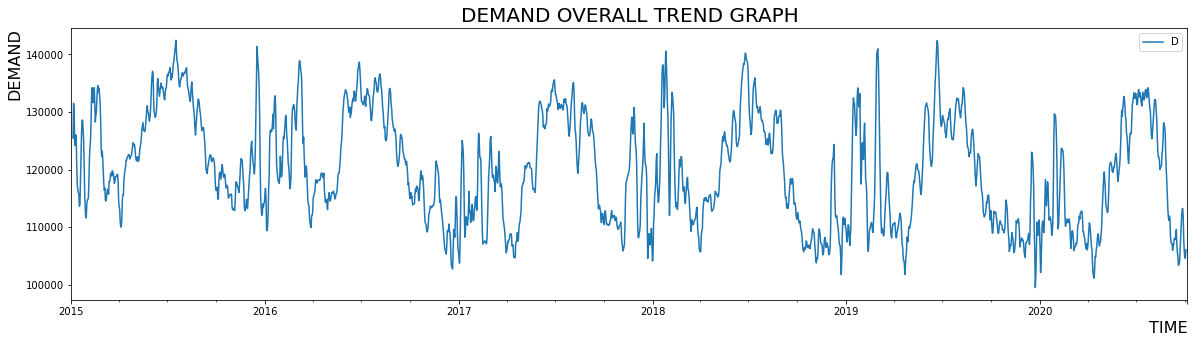

In [71]:
results.trend.plot(figsize=(20,5))
plt.title('DEMAND OVERALL TREND GRAPH', fontsize=20)
plt.xlabel('TIME', fontsize=16, loc='right')
plt.ylabel('DEMAND', fontsize=16, loc='top')
plt.legend('DEMAND', loc='upper right', fontsize=10) 
plt.savefig('#3 DEMAND OVERALL TREND GRAPH', dpi = 300)

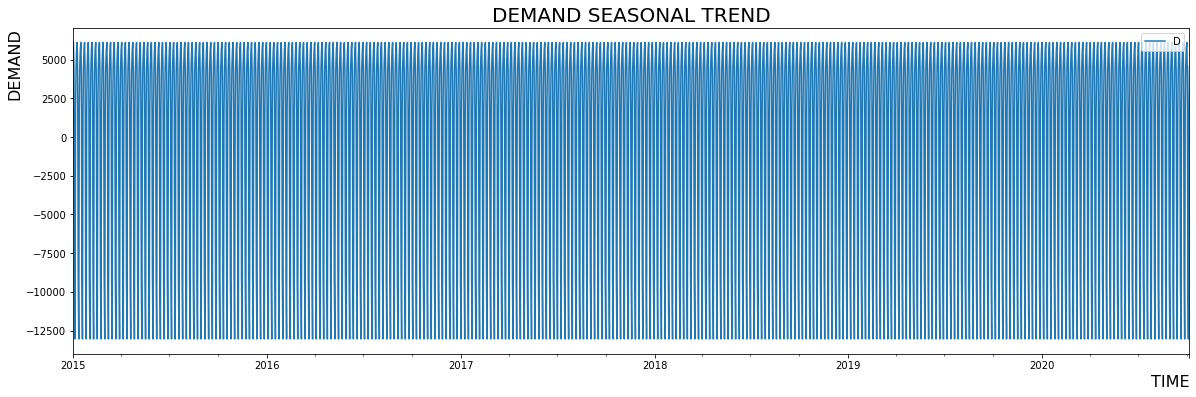

In [72]:
results.seasonal.plot(figsize=(20,6))
plt.title('DEMAND SEASONAL TREND', fontsize=20)
plt.xlabel('TIME', fontsize=16, loc='right')
plt.ylabel('DEMAND', fontsize=16, loc='top')
plt.legend('DEMAND', loc='upper right', fontsize=10) 
plt.savefig('#4 DEMAND SEASONAL TREND', dpi = 300)

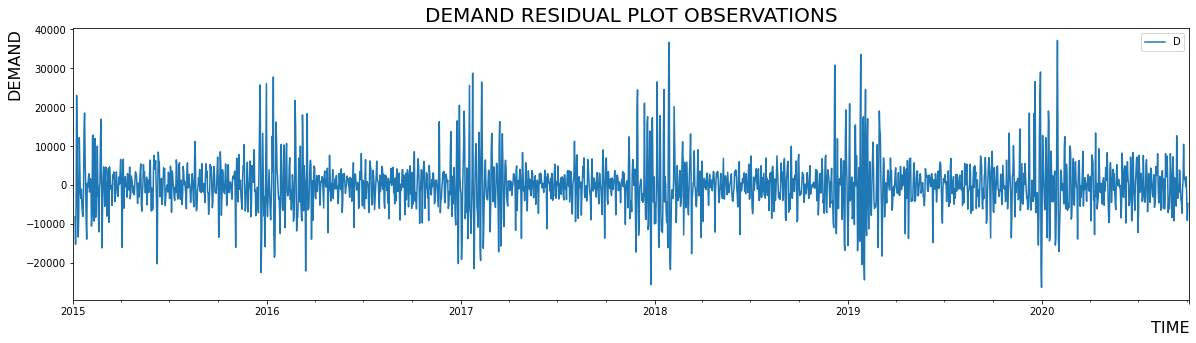

In [73]:
results.resid.plot(figsize=(20,5))

plt.title('DEMAND RESIDUAL PLOT OBSERVATIONS', fontsize=20)
plt.xlabel('TIME', fontsize=16, loc='right')
plt.ylabel('DEMAND', fontsize=16, loc='top')
plt.legend('DEMAND', loc='upper right', fontsize=10) 
plt.savefig('DEMAND RESIDUAL TREND', dpi = 300)

## Train Test Split

In [74]:
len(df)

2106

In [75]:
2106-90

2016

In [76]:
train = df.iloc[:2016]
test = df.iloc[2016:]

In [77]:
len(test)

90

## Scale Data

In [78]:
from sklearn.preprocessing import MinMaxScaler

In [79]:
scaler = MinMaxScaler()

In [80]:
# IGNORE WARNING ITS JUST CONVERTING TO FLOATS
# WE ONLY FIT TO TRAININ DATA, OTHERWISE WE ARE CHEATING ASSUMING INFO ABOUT TEST SET
scaler.fit(train)

MinMaxScaler()

In [81]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [82]:
pip install tensorflow keras

Note: you may need to restart the kernel to use updated packages.


In [83]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [84]:
scaled_train

array([[0.16994794],
       [0.52024209],
       [0.66861293],
       ...,
       [0.59795792],
       [0.64481639],
       [0.6256787 ]])

In [85]:
# define generator
n_input = 10
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [86]:
len(scaled_train)

2016

In [87]:
len(generator) # n_input = 2

2006

In [88]:
scaled_train

array([[0.16994794],
       [0.52024209],
       [0.66861293],
       ...,
       [0.59795792],
       [0.64481639],
       [0.6256787 ]])

In [89]:
# What does the first batch look like?
X,y = generator[0]

In [90]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.16994794 0.52024209 0.66861293 0.22483006 0.38613875 0.53270681
 0.79968295 0.66528326 0.42902068 0.20978725]
Predict this y: 
 [[0.1726446]]


In [91]:
# Let's redefine to get 12 months back and then predict the next month out
n_input = 10
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [92]:
# What does the first batch look like?
X,y = generator[0]

In [93]:
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.16994794 0.52024209 0.66861293 0.22483006 0.38613875 0.53270681
 0.79968295 0.66528326 0.42902068 0.20978725]
Predict this y: 
 [[0.1726446]]


### Create the Model

In [94]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [95]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [96]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
# fit model
model.fit_generator(generator,epochs=300)

Epoch 1/300
  40/2006 [..............................] - ETA: 5s - loss: 0.0174

C:\Users\Revanth\AppData\Local\Temp\ipykernel_3772\4155622748.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(generator,epochs=300)


2006/2006 [==============================] - 5s 2ms/step - loss: 0.0126
Epoch 2/300
2006/2006 [==============================] - 5s 2ms/step - loss: 0.0114
Epoch 3/300
2006/2006 [==============================] - 5s 2ms/step - loss: 0.0108
Epoch 4/300
2006/2006 [==============================] - 5s 2ms/step - loss: 0.0106
Epoch 5/300
2006/2006 [==============================] - 5s 2ms/step - loss: 0.0100
Epoch 6/300
2006/2006 [==============================] - 5s 3ms/step - loss: 0.0097
Epoch 7/300
2006/2006 [==============================] - 5s 2ms/step - loss: 0.0095
Epoch 8/300
2006/2006 [==============================] - 5s 2ms/step - loss: 0.0091
Epoch 9/300
2006/2006 [==============================] - 5s 2ms/step - loss: 0.0091
Epoch 10/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0087
Epoch 11/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0088
Epoch 12/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0087
E

2006/2006 [==============================] - 5s 3ms/step - loss: 0.0055
Epoch 98/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0056
Epoch 99/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0056
Epoch 100/300
2006/2006 [==============================] - 5s 3ms/step - loss: 0.0055
Epoch 101/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0054
Epoch 102/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0054
Epoch 103/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0051
Epoch 104/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0052
Epoch 105/300
2006/2006 [==============================] - 8s 4ms/step - loss: 0.0053
Epoch 106/300
2006/2006 [==============================] - 7s 4ms/step - loss: 0.0052
Epoch 107/300
2006/2006 [==============================] - 7s 4ms/step - loss: 0.0054
Epoch 108/300
2006/2006 [==============================] - 7s 4ms/step

2006/2006 [==============================] - 7s 3ms/step - loss: 0.0035
Epoch 193/300
2006/2006 [==============================] - 7s 3ms/step - loss: 0.0032
Epoch 194/300
2006/2006 [==============================] - 7s 3ms/step - loss: 0.0034
Epoch 195/300
2006/2006 [==============================] - 7s 4ms/step - loss: 0.0033
Epoch 196/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0036
Epoch 197/300
2006/2006 [==============================] - 9s 4ms/step - loss: 0.0031
Epoch 198/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0033
Epoch 199/300
2006/2006 [==============================] - 10s 5ms/step - loss: 0.0032
Epoch 200/300
2006/2006 [==============================] - 8s 4ms/step - loss: 0.0032
Epoch 201/300
2006/2006 [==============================] - 7s 3ms/step - loss: 0.0032
Epoch 202/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0034
Epoch 203/300
2006/2006 [==============================] - 6s 3ms/s

2006/2006 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 288/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0023
Epoch 289/300
2006/2006 [==============================] - 7s 4ms/step - loss: 0.0022
Epoch 290/300
2006/2006 [==============================] - 7s 3ms/step - loss: 0.0023
Epoch 291/300
2006/2006 [==============================] - 5s 3ms/step - loss: 0.0021
Epoch 292/300
2006/2006 [==============================] - 5s 3ms/step - loss: 0.0024
Epoch 293/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 294/300
2006/2006 [==============================] - 6s 3ms/step - loss: 0.0022
Epoch 295/300
2006/2006 [==============================] - 5s 3ms/step - loss: 0.0022
Epoch 296/300
2006/2006 [==============================] - 8s 4ms/step - loss: 0.0022
Epoch 297/300
2006/2006 [==============================] - 5s 3ms/step - loss: 0.0020
Epoch 298/300
2006/2006 [==============================] - 5s 3ms/st

In [99]:
model.history.history.keys()

dict_keys(['loss'])

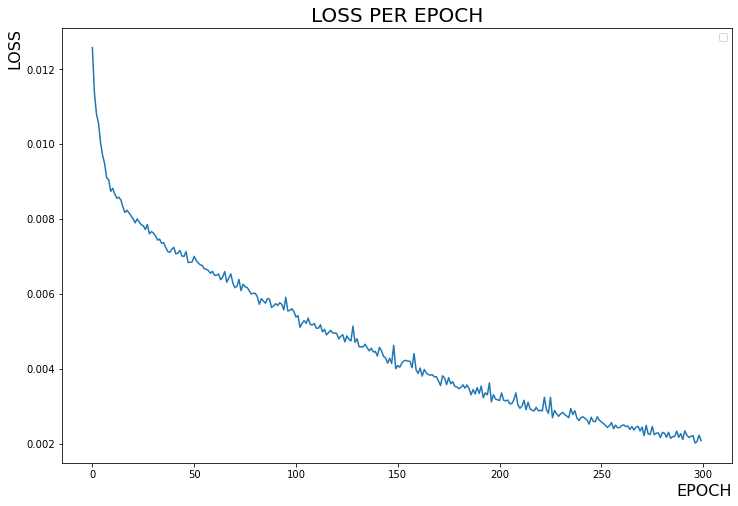

In [112]:
loss_per_epoch = model.history.history['loss']

plt.figure(figsize=(12, 8))
plt.title('LOSS PER EPOCH', fontsize=20)
plt.xlabel('EPOCH', fontsize=16, loc='right')
plt.ylabel('LOSS', fontsize=16, loc='top')
plt.legend('LOSS', loc='upper right', fontsize=10) 

plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

plt.savefig('#6 LOSS PER EPOCH', dpi = 300)

## Evaluate on Test Data

In [113]:
first_eval_batch = scaled_train[-10:]

In [114]:
first_eval_batch

array([[0.65846152],
       [0.61419844],
       [0.48528056],
       [0.54089089],
       [0.6769081 ],
       [0.47108634],
       [0.39052821],
       [0.59795792],
       [0.64481639],
       [0.6256787 ]])

In [115]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [116]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 137ms/step


array([[0.6372648]], dtype=float32)

In [117]:
scaled_test[0]

array([0.58639672])

Now let's put this logic in a for loop to predict into the future for the entire test range.

----

In [118]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [119]:
current_batch.shape

(1, 10, 1)

In [120]:
current_batch

array([[[0.65846152],
        [0.61419844],
        [0.48528056],
        [0.54089089],
        [0.6769081 ],
        [0.47108634],
        [0.39052821],
        [0.59795792],
        [0.64481639],
        [0.6256787 ]]])

In [121]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[ 0.61419844],
        [ 0.48528056],
        [ 0.54089089],
        [ 0.6769081 ],
        [ 0.47108634],
        [ 0.39052821],
        [ 0.59795792],
        [ 0.64481639],
        [ 0.6256787 ],
        [99.        ]]])

**NOTE: PAY CLOSE ATTENTION HERE TO WHAT IS BEING OUTPUTED AND IN WHAT DIMENSIONS. ADD YOUR OWN PRINT() STATEMENTS TO SEE WHAT IS TRULY GOING ON!!**

In [122]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 22ms/step


In [123]:
test_predictions

[array([0.6372648], dtype=float32),
 array([0.58375025], dtype=float32),
 array([0.39677316], dtype=float32),
 array([0.33142948], dtype=float32),
 array([0.51028204], dtype=float32),
 array([0.5772549], dtype=float32),
 array([0.5715054], dtype=float32),
 array([0.5470879], dtype=float32),
 array([0.52291393], dtype=float32),
 array([0.36866075], dtype=float32),
 array([0.33677155], dtype=float32),
 array([0.45831764], dtype=float32),
 array([0.5734291], dtype=float32),
 array([0.57482105], dtype=float32),
 array([0.566343], dtype=float32),
 array([0.52767277], dtype=float32),
 array([0.3620854], dtype=float32),
 array([0.28570038], dtype=float32),
 array([0.45145655], dtype=float32),
 array([0.5123478], dtype=float32),
 array([0.5457964], dtype=float32),
 array([0.5398136], dtype=float32),
 array([0.48315692], dtype=float32),
 array([0.30825418], dtype=float32),
 array([0.26692155], dtype=float32),
 array([0.4717722], dtype=float32),
 array([0.4724201], dtype=float32),
 array([0.4573

In [124]:
scaled_test

array([[0.58639672],
       [0.57207996],
       [0.52588659],
       [0.39437688],
       [0.5262426 ],
       [0.56772866],
       [0.58675478],
       [0.67864514],
       [0.67806618],
       [0.46995981],
       [0.33860596],
       [0.55867618],
       [0.64273111],
       [0.62613447],
       [0.67066794],
       [0.56952583],
       [0.50634778],
       [0.44320263],
       [0.55490009],
       [0.55664233],
       [0.53124876],
       [0.55504397],
       [0.5494585 ],
       [0.30968257],
       [0.29033562],
       [0.50065741],
       [0.64221732],
       [0.64412418],
       [0.65148607],
       [0.68920762],
       [0.4210509 ],
       [0.30471883],
       [0.47762542],
       [0.52649757],
       [0.5008322 ],
       [0.43034473],
       [0.46220152],
       [0.33498112],
       [0.30318528],
       [0.42574127],
       [0.40004317],
       [0.52349994],
       [0.44876952],
       [0.4746718 ],
       [0.49131905],
       [0.37436758],
       [0.58310808],
       [0.623

## Inverse Transformations and Compare

In [125]:
true_predictions = scaler.inverse_transform(test_predictions)

In [126]:
true_predictions

array([[139618.40933752],
       [135039.73390867],
       [119042.07425352],
       [113451.30412291],
       [128753.83331091],
       [134483.99467644],
       [133992.07360956],
       [131902.92369858],
       [129834.61133144],
       [116636.7913658 ],
       [113908.36845651],
       [124307.78685973],
       [134156.66266733],
       [134275.75693101],
       [133550.37989691],
       [130241.77469428],
       [116074.20828045],
       [109538.74673173],
       [123720.75561354],
       [128930.58015245],
       [131792.42249936],
       [131280.53594444],
       [126433.0225417 ],
       [111468.43792491],
       [107932.04001801],
       [125458.9515127 ],
       [125514.38570301],
       [124225.90031017],
       [124884.33813711],
       [121976.9245    ],
       [107705.55539743],
       [104003.51533613],
       [119830.0914127 ],
       [122524.71323521],
       [123005.64435911],
       [122544.72462092],
       [120361.89755799],
       [106039.99001697],
       [1026

In [127]:
test

,demand
date,
2020-07-09,135266.165
2020-07-10,134041.230
2020-07-11,130088.950
2020-07-12,118837.050
2020-07-13,130119.410
...,...
2020-10-02,99585.835
2020-10-03,92277.025
2020-10-04,94081.565


In [128]:
# IGNORE WARNINGS
test['Predictions'] = true_predictions

C:\Users\Revanth\AppData\Local\Temp\ipykernel_3772\1339453577.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


In [129]:
test

,demand,Predictions
date,,
2020-07-09,135266.165,139618.409338
2020-07-10,134041.230,135039.733909
2020-07-11,130088.950,119042.074254
2020-07-12,118837.050,113451.304123
2020-07-13,130119.410,128753.833311
...,...,...
2020-10-02,99585.835,120856.898869
2020-10-03,92277.025,106314.442806
2020-10-04,94081.565,101699.174182


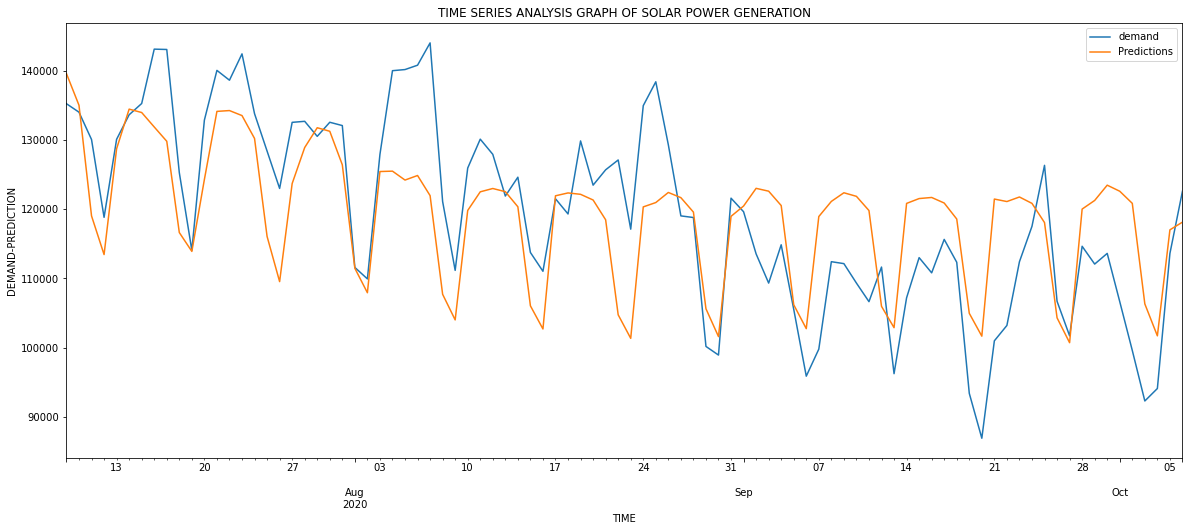

In [150]:
test.plot(figsize=(20,8), title = 'TIME SERIES ANALYSIS GRAPH OF SOLAR POWER GENERATION', xlabel = 'TIME', ylabel = 'DEMAND-PREDICTION')
plt.savefig('#7 TSA GRAPH', dpi = 300)

# Saving and Loading Models

In [ ]:
model.save('my_rnn_model.h5')

## load a model

In [ ]:
from keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [ ]:
new_model.summary()